In [12]:
import os

In [29]:
os.getcwd()
dir_path= "/Users/h2jw/Documents/GitHub/StatApp_2020/"

In [27]:
!ls /Users/h2jw/Documents/GitHub/StatApp_2020/

Bibliographie       Modélisation        README.md
Data                Preparation reunion Visualisation


In [30]:
os.chdir(dir_path+"Modélisation")

In [56]:
print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)
print('pmdarima','1.15.0')
print(statsmodels.__version__)
print(sns.__version__)
print(dt.__version__)

1.1.3
1.19.2
0.23.2
pmdarima 1.15.0
0.12.2
0.11.1


AttributeError: module 'datetime' has no attribute '__version__'

In [58]:
import seaborn as sns
import datetime

ModuleNotFoundError: No module named 'datetime.datetime'; 'datetime' is not a package

In [61]:
import math
from datetime import timedelta

import pandas as pd
import numpy as np
#import Modele_NP_KWT as kwt
#import Modele_NP_final as model_np
from tqdm import tqdm 

In [59]:
dateDebMod = pd.to_datetime("2007-01-01")
dateFinMod = pd.to_datetime("2015-12-31")

hPrev = 7

horizonsPrev = [7, 31+29+31, 365] #Prédictions sur une semaine, 3 mois et un an
            

database = pd.read_csv("/Users/h2jw/Downloads/database_sieges 2.csv",low_memory=False,decimal=',')
database['Coeff_Rempl']=database['PAX'].astype('float')/database["Sièges Corrections_ICI"].astype('float')
database = database.astype({'Date': 'datetime64[ns]','PAX_FQM':'float','Sièges Corrections_ICI':'float','Coeff_Rempl':'float','Coeff_Rempl_FQM':'float'})
database = database.groupby(['Date','Faisceau','ArrDep']).agg({'PAX':'sum','PAX_FQM':'sum','Sièges Corrections_ICI':'sum','Coeff_Rempl':'mean','Coeff_Rempl_FQM':'mean'}).reset_index()

Calendrier = pd.read_csv("/Users/h2jw/Documents/GitHub/StatApp_2020/Data/Calendrier/Calendrier.csv", dayfirst = True , sep = ';' , parse_dates = ['Date'])

histoMod = database[(database['Date']>=dateDebMod) & (database['Date']<=dateFinMod)]
# histoMod.to_csv("HistoMod.csv")

histoPrev = database[(database['Date']>dateFinMod) & (database['Date']<=dateFinMod+timedelta(days = hPrev))]   


In [8]:

Prev_NP = pd.DataFrame()
Prev_KWT = pd.DataFrame()

for faisceau in ['National', 'Schengen', 'Autre UE', 'International', 'Dom Tom'] :
    for mvt in ['Arrivée', 'Départ'] :

        histoMod_2 = histoMod[(histoMod['Faisceau']==faisceau) & (histoMod['ArrDep']==mvt)]


        # Modèle Non-Paramétrique :
        prev_NP = model_np.previsions_NP(histoMod_2, Calendrier, dateDebMod, dateFinMod, hPrev)
        prev_KWT = kwt.previsions_NP_KWT(histoMod_2, dateFinMod, hPrev)
        Prev_NP = pd.concat([Prev_NP, prev_NP],ignore_index=True)  
        Prev_KWT = pd.concat([Prev_KWT, prev_KWT])


# Ajout des prévisions du modèle NP et NP avec ondelettes à histoPrev           
histoPrev = pd.concat([histoPrev.set_index(['Date','Faisceau','ArrDep']),Prev_NP.set_index(['Date','Faisceau','ArrDep']),Prev_KWT.set_index(['Date','Faisceau','ArrDep'])],axis=1)
histoPrev = histoPrev.reset_index()





KeyboardInterrupt: 

In [ ]:
histoPrev.to_csv('prev_7_jours.csv')

In [ ]:
histoPrev.head()

,Date,Faisceau,ArrDep,PAX,PAX_FQM,Sièges Corrections_ICI,Coeff_Rempl,Coeff_Rempl_FQM,PAX_NP,IC95.0_low_NP,IC95.0_up_NP,PAX_NP
0,2016-01-01,Autre UE,Arrivée,621,567.00,877.311749,0.667869,0.685714,484.689369,426.155061,584.663376,708.255442
1,2016-01-01,Autre UE,Départ,561,564.30,737.750683,0.757917,0.833333,936.163248,520.510773,1100.283716,713.697185
2,2016-01-01,Dom Tom,Arrivée,4946,5175.43,5550.247131,0.881251,0.912857,5135.608859,4187.852415,5648.799399,5046.753321
3,2016-01-01,Dom Tom,Départ,4282,4333.00,6103.909119,0.703995,0.675000,5243.083772,4281.222365,5880.438877,5320.410494
4,2016-01-01,International,Arrivée,7557,8100.04,9713.552023,0.777457,0.853077,10163.016864,8564.040412,10957.498650,8378.636710


<AxesSubplot:>

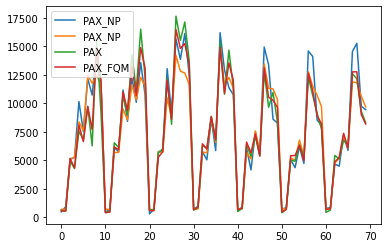

In [ ]:
histoPrev[['PAX_NP','PAX', 'PAX_FQM']].plot()

In [23]:
%matplotlib inline

# Brouillon pour IC lasso

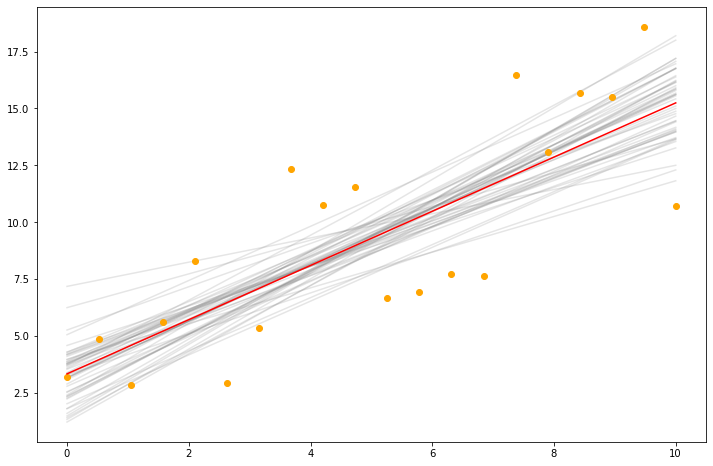

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.ensemble import BaggingRegressor

# Create toy data 
x = np.linspace(0, 10, 20)
y = x + (np.random.rand(len(x)) * 10)

# Extend x data to contain another row vector of 1s
X = np.vstack([x, np.ones(len(x))]).T

n_estimators = 50

model = BaggingRegressor(LassoCV(cv=5, random_state=0), 
                         n_estimators=n_estimators,
                         bootstrap=True)

model.fit(X, y)

plt.figure(figsize=(12,8))

# Accessing each base_estimator (already fitted)
for m in model.estimators_:
    plt.plot(x, m.predict(X), color='grey', alpha=0.2, zorder=1)

plt.scatter(x,y, marker='o', color='orange', zorder=4)

# "Bagging model" prediction
plt.plot(x, model.predict(X), color='red', zorder=5)

# Méthode qui ne fonctionne que sur de l'univarié 

In [15]:
#!pip install mlinsights
from numpy.random import randn, binomial, rand
N = 200
X = rand(N, 1) * 2
eps = randn(N, 1) * 0.2
eps2 = randn(N, 1) + 1
bin = binomial(2, 0.05, size=(N, 1))
y = (0.5 * X + eps + 2 + eps2 * bin).ravel()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from mlinsights.mlmodel import IntervalRegressor


reg= BaggingRegressor(LassoCV(cv=5, random_state=0), 
                         bootstrap=True)

model = IntervalRegressor(alpha=0.05, estimator=reg)
model.fit(X_train, y_train)

sorted_X = np.array(list(sorted(X)))
pred = model.predict(sorted_X)
bootstrapped_pred = model.predict_sorted(sorted_X)
min_pred = bootstrapped_pred[:, 0]
max_pred = bootstrapped_pred[:, bootstrapped_pred.shape[1]-1]


fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(X_test, y_test, '.', label="raw")
ax.plot(sorted_X, pred, label="prediction")
ax.plot(sorted_X, min_pred, '--', label="min")
ax.plot(sorted_X, max_pred, '--', label="max")
ax.legend();

NameError: name 'BaggingRegressor' is not defined

# Méthode existante en R : inférence sélective

Documentation : Il existe des problèmes d'inférence au modèle Lasso (https://cran.r-project.org/web/packages/penalized/vignettes/penalized.pdf p.18). 

Solution apportée dans le package selective-inference https://pypi.org/project/selectinf/ (détail Git : https://github.com/selective-inference/Python-software) et les articles suivants : 
- https://www.stat.cmu.edu/~ryantibs/papers/lassoinf.pdf 
- https://cran.r-project.org/web/packages/selectiveInference/selectiveInference.pdf


In [80]:
! pip install selectinf

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     |████████████████████████████████| 18.4 MB 5.1 MB/s eta 0:00:01     |█████████████████▉              | 10.3 MB 6.3 MB/s eta 0:00:02     |███████████████████▎            | 11.1 MB 6.3 MB/s eta 0:00:02
  Created wheel for selectinf: filename=selectinf-0+unknown-cp38-cp38-macosx_10_9_x86_64.whl size=598525 sha256=4fde75e978292340ddd89fd5bcef584575d047a5d4dc86b17fdab33a68201f86
  Stored in directory: /Users/h2jw/Library/Caches/pip/wheels/48/88/fd/40f014d50fa7ec7b8f75e402571d77476ea24c943e9e86f64c
Successfully built selectinf


In [82]:
import selectinf
help(selectinf)

Help on package selectinf:

NAME
    selectinf

PACKAGE CONTENTS
    _version
    algorithms (package)
    api
    base
    constraints (package)
    distributions (package)
    glm
    info
    learning (package)
    randomized (package)
    sampling (package)
    tests (package)
    truncated (package)
    utils (package)

FILE
    /Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/selectinf/__init__.py




# Tentative bootstrap

In [14]:
from numpy.random import randn, binomial, rand
N = 200
X = rand(N, 1) * 2
eps = randn(N, 1) * 0.2
eps2 = randn(N, 1) + 1
bin = binomial(2, 0.05, size=(N, 1))
y = (0.5 * X + eps + 2 + eps2 * bin).ravel()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


reg= BaggingRegressor(LassoCV(cv=5, random_state=0), n_estimators=200,
                         bootstrap=True)


reg.fit(X_train, y_train)

pred = reg.predict(X)


fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(X_test, y_test, '.', label="raw")
ax.plot(X, pred, label="prediction")
#ax.plot(X, min_pred, '--', label="min")
#ax.plot(X, max_pred, '--', label="max")
ax.legend();

NameError: name 'BaggingRegressor' is not defined

In [ ]:


model.fit(X_train, y_train)

sorted_X = numpy.array(list(sorted(X)))
pred = model.predict(sorted_X)
bootstrapped_pred = model.predict_sorted(sorted_X)
min_pred = bootstrapped_pred[:, 0]
max_pred = bootstrapped_pred[:, bootstrapped_pred.shape[1]-1]


fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(X_test, y_test, '.', label="raw")
ax.plot(sorted_X, pred, label="prediction")
ax.plot(sorted_X, min_pred, '--', label="min")
ax.plot(sorted_X, max_pred, '--', label="max")
ax.legend();

In [115]:
reg.get_params()

{'base_estimator__alphas': None,
 'base_estimator__copy_X': True,
 'base_estimator__cv': 5,
 'base_estimator__eps': 0.001,
 'base_estimator__fit_intercept': True,
 'base_estimator__max_iter': 1000,
 'base_estimator__n_alphas': 100,
 'base_estimator__n_jobs': None,
 'base_estimator__normalize': False,
 'base_estimator__positive': False,
 'base_estimator__precompute': 'auto',
 'base_estimator__random_state': 0,
 'base_estimator__selection': 'cyclic',
 'base_estimator__tol': 0.0001,
 'base_estimator__verbose': False,
 'base_estimator': LassoCV(cv=5, random_state=0),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [181]:
len(X_test)

50

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


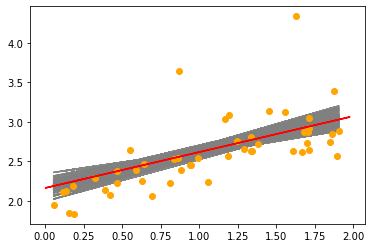

In [122]:
# Accessing each base_estimator (already fitted)

for m in reg.estimators_:
    plt.plot(X_test, m.predict(X_test), color='grey', alpha=0.95, zorder=1)
    list_pred.append(m.predict(X_test))

plt.scatter(X_test,y_test, marker='o', color='orange', zorder=4)

# "Bagging model" prediction
plt.plot(X, pred, color='red', zorder=5)


/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


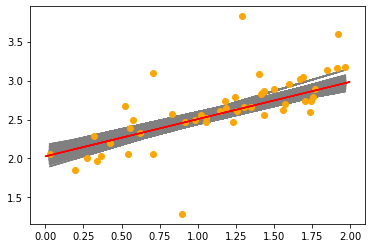

In [185]:
list_pred = []
for m in reg.estimators_:
    plt.plot(X_test, m.predict(X_test), color='grey', alpha=1, zorder=1)
    list_pred.append(m.predict(X_test))

plt.scatter(X_test,y_test, marker='o', color='orange', zorder=4)

# "Bagging model" prediction
plt.plot(X, pred, color='red', zorder=5)



In [182]:
lp_t = np.array(list_pred).transpose()

In [168]:
np.shape(lp_t)

(200, 50)

In [172]:
len(lp_t[0,:])

50

In [183]:
min_pred, max_pred = [],[]
for i in trange(50):
    min_pred.append(min(lp_t[i,:]))
    max_pred.append(max(lp_t[i,:]))

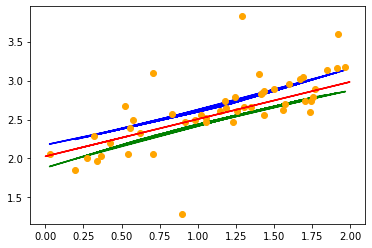

In [184]:
plt.scatter(X_test,y_test, marker='o', color='orange', zorder=4)

# "Bagging model" prediction
plt.plot(X, pred, color='red', zorder=5)
plt.plot(X_test, min_pred, color='green')
plt.plot(X_test, max_pred, color='blue')

# Tentative retenue

In [6]:
import math
from datetime import timedelta
import pandas as pd
import numpy as np

,Date,Faisceau,ArrDep,PAX,PAX_FQM,Sièges Corrections_ICI,Coeff_Rempl,Coeff_Rempl_FQM
0,2008-01-01,Autre UE,Arrivée,242,0.00000,296.205128,0.817001,NaN
1,2008-01-01,Autre UE,Départ,267,0.00000,391.237671,0.663779,NaN
2,2008-01-01,Dom Tom,Arrivée,4122,0.00000,4371.843733,0.956682,NaN
3,2008-01-01,Dom Tom,Départ,2730,0.00000,4903.660937,0.585989,NaN
4,2008-01-01,International,Arrivée,8323,0.00000,9600.446843,0.855056,NaN
...,...,...,...,...,...,...,...,...
32700,2016-12-31,International,Départ,8340,7395.69703,13372.873191,0.641940,0.564379
32701,2016-12-31,National,Arrivée,11008,9263.22000,14453.786561,0.774203,0.671477
32702,2016-12-31,National,Départ,8055,8338.10000,12025.994075,0.681883,0.700649
32703,2016-12-31,Schengen,Arrivée,13414,11939.36000,14558.234320,0.930659,0.825949


In [67]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange
from sklearn.linear_model import LassoCV

dateDebMod = pd.to_datetime("2007-01-01")
dateFinMod = pd.to_datetime("2015-12-31")
hPrev=91
ic=0.95

database = pd.read_csv("/Users/h2jw/Downloads/database_sieges 2.csv",low_memory=False,decimal=',')
database['Coeff_Rempl']=database['PAX'].astype('float')/database["Sièges Corrections_ICI"].astype('float')
database = database.astype({'Date': 'datetime64[ns]','PAX_FQM':'float','Sièges Corrections_ICI':'float','Coeff_Rempl':'float','Coeff_Rempl_FQM':'float'})
database = database.groupby(['Date','Faisceau','ArrDep']).agg({'PAX':'sum','PAX_FQM':'sum','Sièges Corrections_ICI':'sum','Coeff_Rempl':'mean','Coeff_Rempl_FQM':'mean'}).reset_index()

Calendrier = pd.read_csv("/Users/h2jw/Documents/GitHub/StatApp_2020/Data/Calendrier/Calendrier.csv", dayfirst = True , sep = ';' , parse_dates = ['Date'])

# Sélection des variables d'intérêt du Calendrier : 
colonnesCalendrier = ["Mois" , "JourSem" , "Semaine" , "LunF" , "MarF" , 
                          "Mer1F" , "Mer2F" , "JeuF" , "VenF" ,"SamF" , "DimF" , "Vac_Toussaint" , "Vac_Noel" ,
                          "Vac_Hiver_A" , "Vac_Hiver_B" , "Vac_Hiver_C" ,"Vac_Printemps_A" , "Vac_Printemps_B" , "Vac_Printemps_C" ,"Vac_Ete"]
Calendrier = Calendrier[["Date"]+colonnesCalendrier]
Calendrier = Calendrier.fillna(0)


histoMod = database[(database['Date']>=dateDebMod) & (database['Date']<=dateFinMod)]

# Idée : on transforme les colonnes de vacances en indicatrices qui valent 1 si on est en première semaine de vacances (variable <= med(variable))
# for k in range(1,10) :
#     mediane_k = Calendrier[colonnesCalendrier[-k]].median()
#     Calendrier[colonnesCalendrier[-k]] = Calendrier[colonnesCalendrier[-k]] <= mediane_k
# => sur le test Schengen/Arrivées/hPrev=7j, ça diminue le score du modèle...

X_pred = []
X_mod=[]
# Augmentation histo & Récupération données utilisées pour l'entrainement :
histoMod = pd.concat([histoMod.set_index('Date'), Calendrier.set_index('Date')], axis=1, join="inner")
histoMod = histoMod.reset_index()
y_mod = histoMod['PAX']
X_mod = histoMod[colonnesCalendrier]


# Récupération données utilisées pour les prédictions :
X_pred = Calendrier[(Calendrier['Date']>dateFinMod)&(Calendrier['Date']<=dateFinMod+timedelta(days=hPrev))]
X_pred = X_pred[colonnesCalendrier]

# Création des indicatrices pour chaque colonne du calendrier ayant plus de 2 modalités (JourSem, Mois, ...) :
encodeur = OneHotEncoder(drop='first').fit(X_mod)
X_mod = encodeur.transform(X_mod).toarray()
X_pred = encodeur.transform(X_pred).toarray()
        # la commande drop='first' permet d'enlever l'une des indicatrices à chaque fois (la première arbitrairement)


print(np.shape(X_pred),np.shape(X_mod))


(91, 300) (29045, 300)


In [65]:
def prediction_interval(model, X_train, y_train, x0, alpha):
  ''' Compute a prediction interval around the model's prediction of x0.

  INPUT
    model
      A predictive model with `fit` and `predict` methods
    X_train: numpy array of shape (n_samples, n_features)
      A numpy array containing the training input data
    y_train: numpy array of shape (n_samples,)
      A numpy array containing the training target data
    x0
      A new data point, of shape (n_features,)
    alpha: float = 0.05
      The prediction uncertainty

  OUTPUT
    A triple (`lower`, `pred`, `upper`) with `pred` being the prediction
    of the model and `lower` and `upper` constituting the lower- and upper
    bounds for the prediction interval around `pred`, respectively. '''

  # Number of training samples
  n = X_train.shape[0]

  # We choose to make 1000 bootstraps
  nbootstraps=1000

  # Compute the m_i's and the validation residuals
  bootstrap_preds, val_residuals = pd.DataFrame(), []
  for b in trange(nbootstraps):
    train_idxs = np.random.choice(range(n), size = n, replace = True)
    val_idxs = np.array([idx for idx in range(n) if idx not in train_idxs])
    model.fit(X_train[train_idxs, :], y_train[train_idxs])
    preds = model.predict(X_train[val_idxs])
    val_residuals.append(y_train[val_idxs] - preds)
    

    bootstrap_preds[b] = model.predict(x0)
  bootstrap_preds -= np.mean(bootstrap_preds)
  val_residuals = np.concatenate(val_residuals)

  # Compute the prediction and the training residuals
  model.fit(X_train, y_train)
  preds = model.predict(X_train)
  train_residuals = y_train - preds

  # Take percentiles of the training- and validation residuals to enable
  # comparisons between them
  val_residuals = np.percentile(val_residuals, q = np.arange(100))
  train_residuals = np.percentile(train_residuals, q = np.arange(100))

  # Compute the .632+ bootstrap estimate for the sample noise and bias
  no_information_error = np.mean(np.abs(np.random.permutation(y_train) - \
    np.random.permutation(preds)))
  generalisation = np.abs(val_residuals.mean() - train_residuals.mean())
  no_information_val = np.abs(no_information_error - train_residuals)
  relative_overfitting_rate = np.mean(generalisation / no_information_val)
  weight = .632 / (1 - .368 * relative_overfitting_rate)
  residuals = (1 - weight) * train_residuals + weight * val_residuals

  # Construct the C set and get the percentiles
  C = np.array([m + o for m in bootstrap_preds for o in residuals])
  qs = [100 * alpha / 2, 100 * (1 - alpha / 2)]
  percentiles = np.percentile(C, q = qs)

  return percentiles[0], model.predict(x0), percentiles[1]

In [68]:
model = LassoCV(cv=5,eps=0.001, n_alphas=100, normalize=True)
        # L'argument normalize=True va normaliser toutes les colonnes de X
model.fit(X_mod,y_mod)

predictions = model.predict(X_pred)

# Calcul des IC par bootstrap

intervals = prediction_interval(model, X_mod, y_mod, X_pred, 0.95)

# Mise en forme des prédictions :
faisceau = histoMod['Faisceau'][0] 
mvt = histoMod['ArrDep'][0]

PrevisionsLasso=[]
for k in trange(hPrev) :
    PrevisionsLasso.append([dateFinMod + timedelta(days=k+1) , faisceau, mvt, predictions[k]])

PrevisionsLasso = pd.DataFrame(data=PrevisionsLasso,columns = ["Date", "Faisceau", "ArrDep", "PAX_Lasso"])
#PrevisionsLasso["IC"+str(int(ic*100))+"_low_LASSO"] = min_pred
#PrevisionsLasso["IC"+str(int(ic*100))+"_up_LASSO"] = max_pred


/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76656005.63806152, tolerance: 73203133.51422526
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80665326.41503906, tolerance: 73203133.51422526
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92960735.64953613, tolerance: 73203133.51422526
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77569461.46923828, tolerance: 73303005.69543266
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77656108.60632324, tolerance: 73303005.69543266
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74970612.12329102, tolerance: 72942385.56952973
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82748235.13317871, tolerance: 72228258.90131275
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100119700.94812012, tolerance: 72228258.90131275
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79277316.17211914, tolerance: 72370679.81283453
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99843943.73278809, tolerance: 72173428.09680147
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99814892.99890137, tolerance: 72173428.09680147
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88330743.58190918, tolerance: 72672538.5868949
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/

NameError: name 'min_pred' is not defined

In [69]:
PrevisionsLasso["IC"+str(int(ic*100))+"_low_LASSO"] = PrevisionsLasso["PAX_Lasso"]+intervals[0]
PrevisionsLasso["IC"+str(int(ic*100))+"_up_LASSO"] = PrevisionsLasso["PAX_Lasso"]+ intervals[2]

In [70]:
PrevisionsLasso

,Date,Faisceau,ArrDep,PAX_Lasso,IC95_low_LASSO,IC95_up_LASSO
0,2016-01-01,Autre UE,Arrivée,6515.214334,5919.811825,6735.740021
1,2016-01-02,Autre UE,Arrivée,6977.504462,6382.101953,7198.030149
2,2016-01-03,Autre UE,Arrivée,8562.241341,7966.838832,8782.767028
3,2016-01-04,Autre UE,Arrivée,7244.391945,6648.989435,7464.917632
4,2016-01-05,Autre UE,Arrivée,6523.295065,5927.892555,6743.820752
...,...,...,...,...,...,...
86,2016-03-27,Autre UE,Arrivée,6973.618300,6378.215790,7194.143987
87,2016-03-28,Autre UE,Arrivée,7313.710953,6718.308443,7534.236640
88,2016-03-29,Autre UE,Arrivée,6592.614073,5997.211563,6813.139760
89,2016-03-30,Autre UE,Arrivée,6665.361893,6069.959383,6885.887580


In [ ]:
import seaborn as sns
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(12,6))


PrevisionsLasso[['Date','PAX_Lasso']].set_index('Date').plot(ax = ax,legend=True,style='o-')
PrevisionsLasso[['Date','IC95_low_LASSO']].set_index('Date').plot(ax=ax,legend=True,style='o--')
PrevisionsLasso[['Date','IC95_up_LASSO']].set_index('Date').plot(ax=ax,legend=True,style='o--')


In [ ]:
PrevisionsLasso

In [60]:
pd.DataFrame()

""


In [34]:
np.shape(X_mod), np.shape(X_pred)

((29045, 20), (7, 20))

In [39]:
predictions

array([6515.21433424, 6977.50446235, 8562.24134149, 7244.39194495,
       6523.29506501, 6596.0428849 , 7206.4942607 ])

In [88]:
PrevisionsLasso

,Date,Faisceau,ArrDep,PAX_Lasso,IC95_low_LASSO,IC95_up_LASSO
0,2016-01-01,Autre UE,Arrivée,7133.845835,-236.471828,18928.412785
1,2016-01-02,Autre UE,Arrivée,7708.452777,338.135114,19503.019727
2,2016-01-03,Autre UE,Arrivée,7843.424475,473.106812,19637.991426
3,2016-01-04,Autre UE,Arrivée,6698.474741,-671.842922,18493.041691
4,2016-01-05,Autre UE,Arrivée,6837.978620,-532.339042,18632.545571
5,2016-01-06,Autre UE,Arrivée,6977.482500,-392.835163,18772.049451
6,2016-01-07,Autre UE,Arrivée,7116.986380,-253.331283,18911.553330


In [71]:
PrevisionsLasso.to_csv('previsionsLasso91j.csv')